In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from descriptive_stat import frequency_table, pareto_plot, bucket_table

## note:
* check number of bedrooms, bathrooms and beds

In [2]:
data_path = r'C:\Users\DucTRung\Desktop\data_set\lux_stay'

In [3]:
df = pd.read_csv(data_path + '\luxstay_dataset.csv')

In [63]:
df

,id,num_bedrooms,num_bathrooms,num_beds,max_guests,booking_type,review_count,rating,checkin_price,nightly_price,weekly_price,cleaning_fee,additional_guests_fee,additional_children_fee,additional_infants_fee,standard_guests,standard_children,standard_infants,min_stay,max_stay,property_type,province,district,exp_type,region
0,29329,2.0,2.0,2.0,4,instant_book,1,5.0,82.87,82.87,82.87,8.77,8.77,0.00,0.0,4,4,0,1,no_limit,Condominium,HaNoi,BaDinh,Delta,North
1,36402,2.0,2.0,2.0,4,instant_book,7,5.0,46.04,46.04,65.77,0.00,0.00,0.00,0.0,4,4,0,1,no_limit,Condominium,HoChiMinh,Quan4,Delta,South
2,37069,1.0,1.0,1.0,2,instant_book,5,5.0,78.92,78.92,92.08,0.00,0.00,0.00,0.0,1,1,0,1,limit,Condominium,HoChiMinh,BinhThanh,Delta,South
3,37148,2.0,2.0,2.0,4,instant_book,1,5.0,61.38,61.38,61.38,0.00,21.92,0.00,0.0,4,4,0,1,limit,Condominium,HoChiMinh,BinhThanh,Delta,South
4,36712,1.0,1.0,1.0,2,instant_book,5,5.0,30.69,30.69,32.88,0.00,0.00,0.00,0.0,2,2,0,2,limit,Condominium,HoChiMinh,Quan4,Delta,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,68242,2.0,1.0,3.0,5,request_to_book,0,0.0,32.00,32.00,35.00,10.00,0.00,0.00,0.0,5,5,0,1,limit,Condominium,DaNang,NguHanhSon,Beach,Central
10145,69025,1.0,1.0,1.0,3,request_to_book,0,0.0,21.18,21.18,23.19,0.00,4.38,2.63,0.0,2,2,0,1,limit,Entire House,LamDong,Tp.DaLat,Mountain,South
10146,69065,4.0,4.0,4.0,12,request_to_book,0,0.0,67.96,67.96,92.08,0.00,6.58,4.38,0.0,8,8,0,1,limit,Serviced_Apartment,LamDong,Tp.DaLat,Mountain,South
10147,68582,1.0,1.0,1.0,2,request_to_book,0,0.0,12.28,12.28,12.28,0.00,4.38,0.00,0.0,2,2,0,1,limit,Entire House,HaNoi,HoanKiem,Delta,North


In [68]:
df[df['province'] == 'QuangNinh']['region']

9        North
29       North
34       North
36       North
39       North
         ...  
10124    North
10130    North
10141    North
10142    North
10143    North
Name: region, Length: 259, dtype: object

## Province

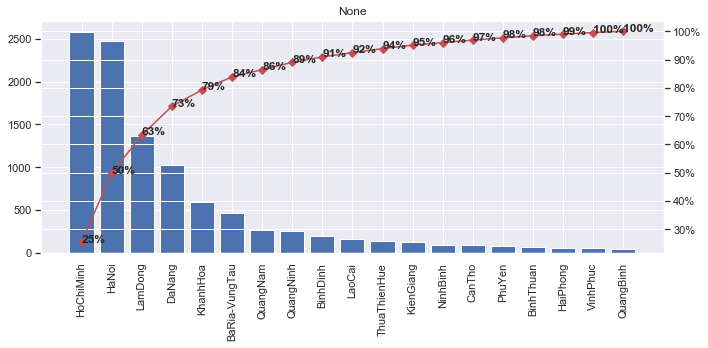

In [6]:
pareto_plot(df['province'], ro_degree=90, fig_size=(10, 5))

In [7]:
province_f = df[df['province'].isin(['HoChiMinh', 'HaNoi', 'LamDong', 'DaNang', 'KhanhHoa', 'BaRia-VungTau'])]

Text(0, 0.5, '')

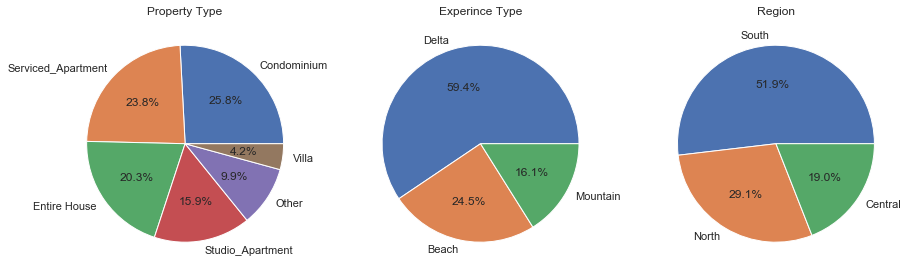

In [26]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 9))
province_f['property_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Property Type')
axes[0].set_ylabel('')

province_f['exp_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Experince Type')
axes[1].set_ylabel('')

province_f['region'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[2])
axes[2].set_title('Region')
axes[2].set_ylabel('')

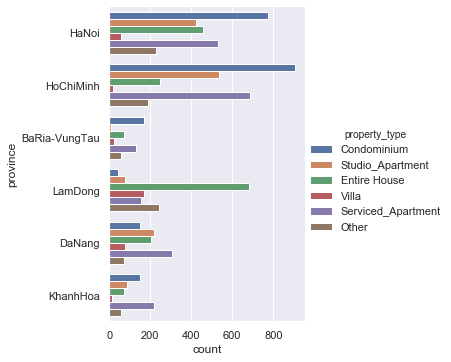

In [8]:
sns.catplot(kind='count', data=province_f, 
            y='province', hue='property_type')

## Results
* All accommodations (10315) are located in (12) provinces or major cities.

* Almost 90% of accommodations is in 6 provinces:
    * HoChiMinh/ HaNoi/ LamDong/ DaNang/ BaRia-VungTau/ KhanhHoa
    
* Top property type variablity are:
    * HoChiMinh/ HaNoi/ DaNang/ LamDong.
__________

## District

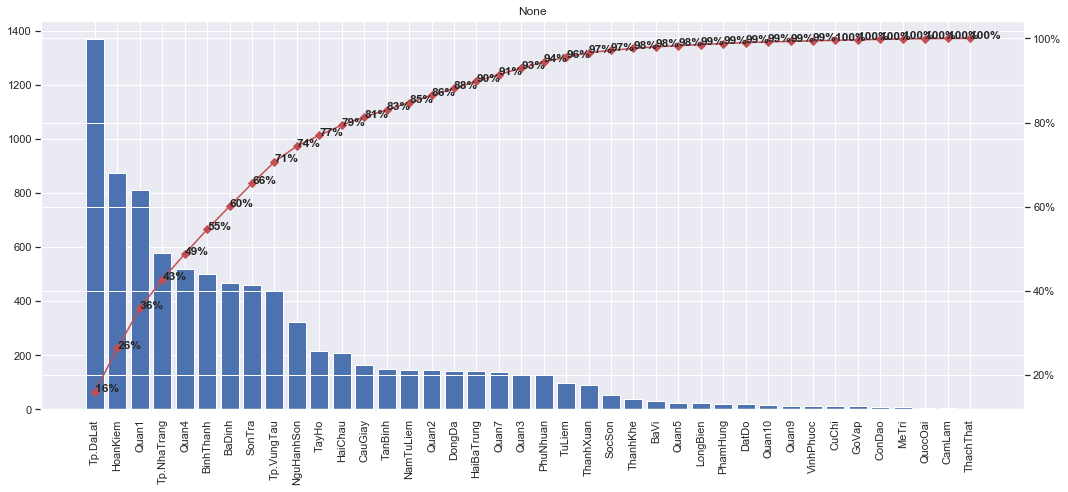

In [85]:
pareto_plot(province_f['district'], ro_degree=90, fig_size=(15, 7))

In [86]:
top_13_district = province_f['district'].value_counts()[:13]

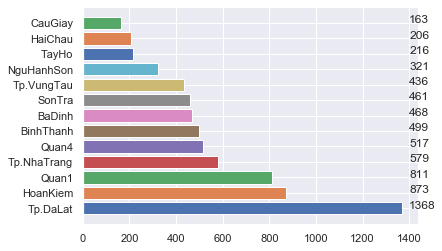

In [88]:
# top_10_district.plot(kind='barh')
# for i, j in enumerate(top_10_district.values):
#     plt.annotate(j, (1000, j))

for i , j in zip(top_13_district.index, top_13_district.values):
    plt.barh(i, j)
    plt.annotate(j, (1400, i))

In [94]:
district_f = df[df['district'].isin(top_13_district.index)]

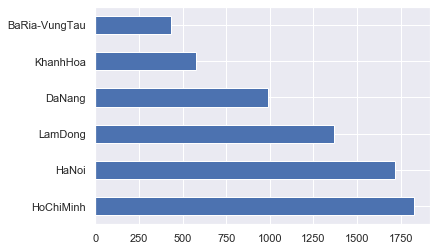

In [100]:
district_f['province'].value_counts().plot.barh()

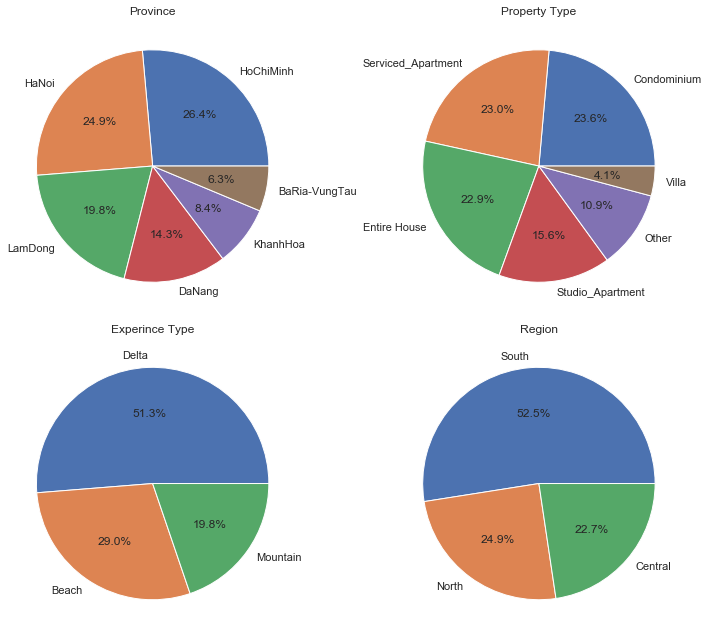

In [105]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 9))

district_f['province'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 0])
axes[0, 0].set_title('Province')
axes[0, 0].set_ylabel('')

district_f['property_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1])
axes[0, 1].set_title('Property Type')
axes[0, 1].set_ylabel('')

district_f['exp_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 0])
axes[1, 0].set_title('Experince Type')
axes[1, 0].set_ylabel('')

district_f['region'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set_title('Region')
axes[1, 1].set_ylabel('')

plt.tight_layout()

## Experience Type

In [57]:
fre_f = df['exp_type'].value_counts()

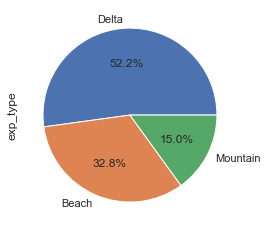

In [58]:
fre_f.plot(kind='pie', autopct='%1.1f%%')

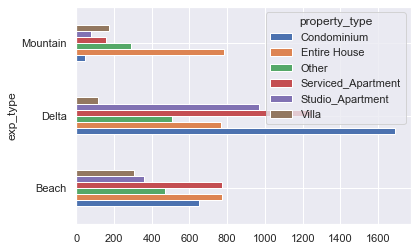

In [60]:
pd.crosstab(df['exp_type'], df['property_type']).plot(kind='barh')

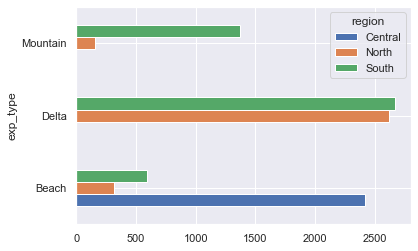

In [69]:
pd.crosstab(df['exp_type'], df['region']).plot(kind='barh')

## Results:
* Urban travel experince's relative frequnecy is over 50% (51.1%):
    * Accommodations are located in two biggest cities (HoChiMinh & HaNoi)

* Beach travel type's relative frequancy is second poistion (32.8%):
    * But it has the most various location (8) and focus on middle region.

* Mountain travel type's relative frequancy is third poistion (16.1%):
    * Like Urban, they have only 2 location.
    * But almost accommodations is in south region.
    
____________    

## Region

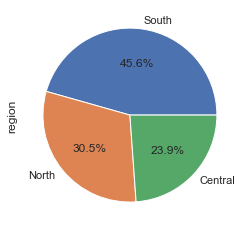

In [70]:
df['region'].value_counts().plot.pie(autopct='%1.1f%%')

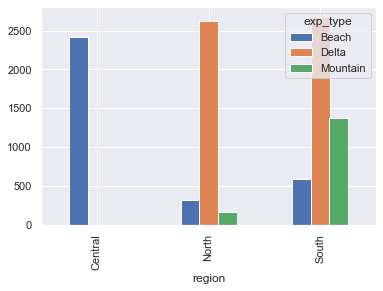

In [71]:
pd.crosstab(df['region'], df['exp_type']).plot.bar()

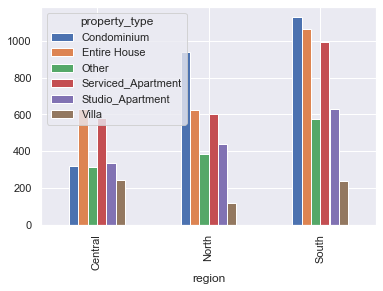

In [72]:
pd.crosstab(df['region'], df['property_type']).plot.bar()

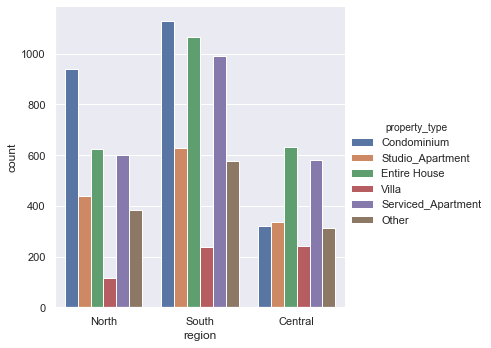

In [73]:
sns.catplot(kind='count', data=df,
            x='region', hue='property_type')

## Results:
* Middle: has only one experince type (Beach)
   
* South & North have all three types of experience:
    * But, South has much more accommodations than North in every travel type.
    * Except Urbar, accommodations in North of the two others type is trivial.
    
___________

### Property Type

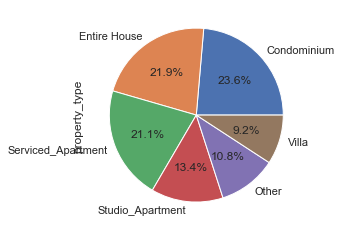

In [278]:
df['property_type'].value_counts().plot.pie(autopct='%1.1f%%')

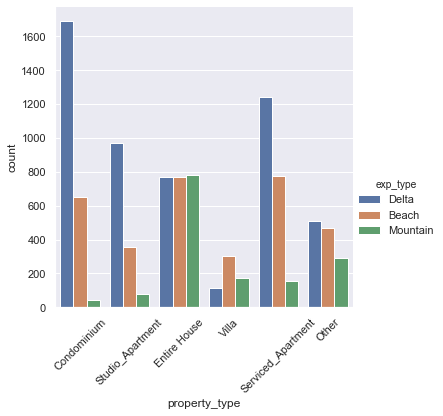

In [81]:
g = sns.catplot(kind='count', data=df,
            x='property_type', hue='exp_type')
g.set_xticklabels(rotation=45)

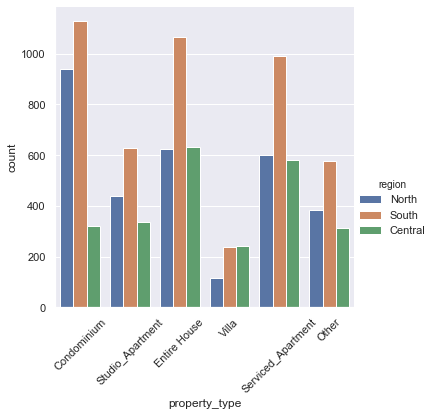

In [82]:
g = sns.catplot(kind='count', data=df,
            x='property_type', hue='region')
g.set_xticklabels(rotation=45)

## Price (nightly - weekly)

In [295]:
# nightly_price
nightly_price = df['nightly_price']

In [296]:
nightly_price.describe(include='all')

count    10210.000000
mean        51.348353
std         47.912352
min          3.460000
25%         23.240000
50%         35.080000
75%         61.380000
max        366.110000
Name: nightly_price, dtype: float64

In [297]:
# weekly_price
weekly_price = df['weekly_price']

In [298]:
# take 99% of samples
q = weekly_price.quantile(q=.99)
# clean weekly_price
df = df[weekly_price <= q] 

In [299]:
weekly_price.describe(include='all')

count    10210.000000
mean        59.503561
std         69.096099
min          4.170000
25%         25.000000
50%         38.000000
75%         68.967500
max       3020.000000
Name: weekly_price, dtype: float64

In [300]:
price = df[['nightly_price', 'weekly_price']]

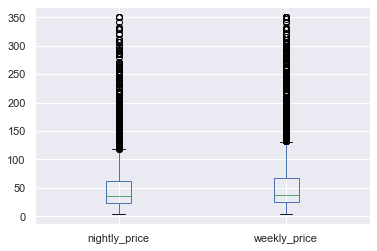

In [301]:
price.plot.box()

In [302]:
nightly_price = price['nightly_price']
weekly_price = price['weekly_price']

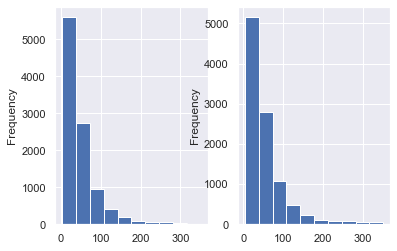

In [303]:
fig, axes = plt.subplots(nrows=1, ncols=2)

nightly_price.plot(ax=axes[0], kind='hist')
weekly_price.plot(ax=axes[1], kind='hist')

In [304]:
n_pri_pro = nightly_price.groupby(df['province']).mean().sort_values()
w_pri_pro = weekly_price.groupby(df['province']).mean().sort_values()

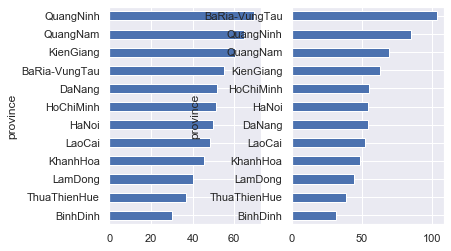

In [305]:
fig, axes = plt.subplots(ncols=2, nrows=1)
fig
n_pri_pro.plot(ax=axes[0], kind='barh')
w_pri_pro.plot(ax=axes[1], kind='barh')

In [306]:
n_pri_exp = nightly_price.groupby(df['exp_type']).mean().sort_values()
w_pri_exp = weekly_price.groupby(df['exp_type']).mean().sort_values()

n_pri_reg = nightly_price.groupby(df['region']).mean().sort_values()
w_pri_reg = weekly_price.groupby(df['region']).mean().sort_values()

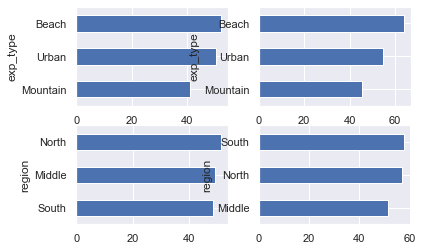

In [307]:
fig, axes = plt.subplots(ncols=2, nrows=2)

n_pri_exp.plot(ax=axes[0, 0], kind='barh')
w_pri_exp.plot(ax=axes[0, 1], kind='barh')

n_pri_reg.plot(ax=axes[1, 0], kind='barh')
w_pri_reg.plot(ax=axes[1, 1], kind='barh')

In [308]:
n_pri_per = nightly_price.groupby(df['property_type']).mean().sort_values()
w_pri_per = weekly_price.groupby(df['property_type']).mean().sort_values()

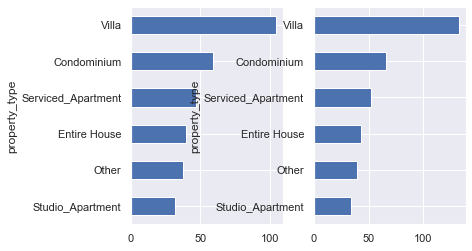

In [309]:
fig, axes = plt.subplots(ncols=2, nrows=1)

n_pri_per.plot(ax=axes[0], kind='barh')
w_pri_per.plot(ax=axes[1], kind='barh')

In [310]:
df.groupby(['property_type', 'district'])[['nightly_price', 'weekly_price']].mean().sort_values(by='weekly_price', ascending=False)

nightly_price  weekly_price
property_type district                               
Villa         ThachThat      206.801667    296.690000
              Tp.VungTau     123.663625    250.867625
              QuocOai        170.058889    225.403333
              NguHanhSon     213.741875    221.999063
              DatDo          146.414667    219.460000
...                                 ...           ...
Other         ThanhKhe        14.556000     14.556000
Entire House  CauGiay         13.150000     14.030000
              Quan10          14.014000     14.014000
              GoVap           13.920000     13.920000
Other         NamTuLiem       13.683333     13.683333

[226 rows x 2 columns]

In [311]:
pro_pro_price = df.groupby(['province', 'property_type'])[['nightly_price', 'weekly_price']].mean()
pd.set_option('display.max_rows', pro_pro_price.shape[0]+1)
pro_pro_price

nightly_price  weekly_price
province      property_type                                  
BaRia-VungTau Condominium             45.431364     92.176080
              Entire House            46.601649     78.450619
              Other                   27.394310     33.861897
              Serviced_Apartment      39.845946     73.337095
              Studio_Apartment        23.555556     40.367778
              Villa                  126.201146    243.628229
BinhDinh      Condominium             44.358889     45.577778
              Entire House            30.387755     31.252041
              Other                   21.290937     21.565000
              Serviced_Apartment      40.877692     40.877692
              Studio_Apartment        25.042222     28.871111
              Villa                   96.460000     96.460000
DaNang        Condominium             60.868269     63.052949
              Entire House            47.753640     49.689956
              Other                   36.137532     36.700130
              Serviced_Apartment      48.123805     49.908962
              Studio_Apartment        28.352387     30.364324
              Villa                  132.012198    137.002747
HaNoi         Condominium             56.097053     58.914093
              Entire House            45.266660     48.889631
              Other                   47.061399     52.119671
              Serviced_Apartment      42.945019     45.286161
              Studio_Apartment        30.046828     32.121041
              Villa                  136.185664    181.046195
HoChiMinh     Condominium             67.142844     70.703813
              Entire House            32.246078     33.930118
              Other                   38.617424     40.755000
              Serviced_Apartment      52.629899     57.714481
              Studio_Apartment        32.604785     34.776262
              Villa                   92.040417    100.978333
KhanhHoa      Condominium             50.611911     53.575796
              Entire House            36.942911     38.470253
              Other                   30.427719     30.820175
              Serviced_Apartment      41.696624     44.563803
              Studio_Apartment        38.776860     40.484651
              Villa                  144.707826    154.864783
KienGiang     Condominium             36.830000     39.020000
              Entire House            46.938125     47.489063
              Other                   45.719273     46.693636
              Serviced_Apartment      40.453333     41.080000
              Studio_Apartment        27.000000     50.000000
              Villa                  146.680500    156.104000
LamDong       Condominium             52.160667     59.351333
              Entire House            31.151192     33.848953
              Other                   25.246235     27.189231
              Serviced_Apartment      45.444817     51.537561
              Studio_Apartment        34.996329     38.360506
              Villa                   75.207154     84.545929
LaoCai        Condominium             28.500000     28.500000
              Entire House            47.022692     51.210288
              Other                   43.139474     45.253860
              Villa                  169.737500    185.280000
QuangNam      Entire House            47.250172     49.270862
              Other                   58.899808     60.385192
              Serviced_Apartment      62.430000     65.022857
              Studio_Apartment        40.661818     40.981818
              Villa                   78.487863     86.647778
QuangNinh     Condominium             52.880759     66.332966
              Entire House            75.807368     88.357368
              Other                   41.975000     50.291429
              Serviced_Apartment      70.807895     85.363684
              Studio_Apartment        24.922000     31.900000
              Villa                  165.979310    196.374138
Thua

In [312]:
df.groupby(['exp_type', 'property_type'])[['nightly_price', 'weekly_price']].mean()

nightly_price  weekly_price
exp_type property_type                                  
Beach    Condominium             52.011402     68.979476
         Entire House            44.889239     51.190451
         Other                   36.868243     38.837297
         Serviced_Apartment      44.520544     52.952241
         Studio_Apartment        30.998718     33.409459
         Villa                  114.111162    149.497955
Mountain Condominium             51.646304     58.680652
         Entire House            33.235328     36.128725
         Other                   28.601217     30.576349
         Serviced_Apartment      45.444817     51.537561
         Studio_Apartment        34.996329     38.360506
         Villa                   76.678444     86.113774
Urban    Condominium             62.201808     65.430000
         Entire House            40.797954     43.755478
         Other                   43.270227     47.017166
         Serviced_Apartment      48.418396     52.309984
         Studio_Apartment        31.490401     33.619504
         Villa                  128.452190    167.019708

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


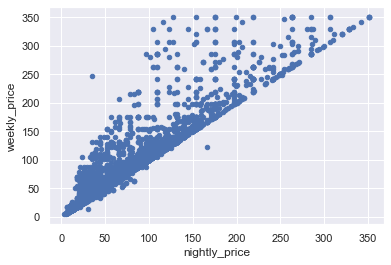

In [313]:
price.plot.scatter(x='nightly_price', y='weekly_price')

In [320]:
price = df[['nightly_price', 'weekly_price', 'province']]

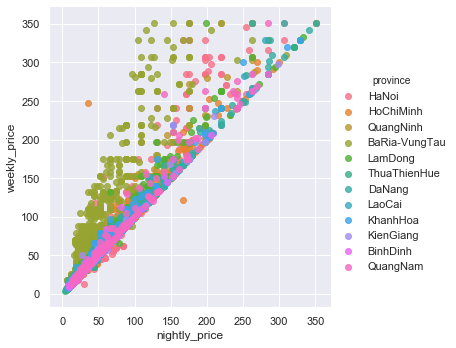

In [323]:
sns.lmplot(x='nightly_price', y='weekly_price', data=price, hue='province', fit_reg=False)

## Results:
* Thuê theo tuần đắt đỏ hơn theo ngày.
_____________

## Room Quality

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

In [ ]:
df[['num_bedrooms', 'num_bathrooms', 'num_beds', 'max_guests', 'cleaning_fee', 'security_fee', 'additional_guests_fee', 'additional_children_fee', 'additional_infants_fee', 'standard_guests', 'standard_children', 'standard_infants', 'min_stay', 'max_stay']]

#### number of bedrooms

In [ ]:
num_bedr = df['num_bedrooms']

In [ ]:
num_bedr.describe()

In [ ]:
q = num_bedr.quantile(q=.99)
num_bedr_ = num_bedr[num_bedr <= q]

In [ ]:
df = df[num_bedr <= q]

In [ ]:
num_bedr_.describe()

In [ ]:
num_bedr_.plot.box()

### number of bathrooms

In [ ]:
num_bathr = df['num_bathrooms']

In [ ]:
num_bathr.describe(include='all')

In [ ]:
num_bathr.plot.box()

#### number of beds

In [ ]:
num_beds = df['num_beds']

In [ ]:
num_beds.describe(include='all')

In [ ]:
q = num_beds.quantile(q=.99)
num_beds_ = num_beds[num_beds <= q]

In [ ]:
df = df[num_beds <= q]

In [ ]:
num_beds_.plot.box()

#### max guests

In [ ]:
max_g = df['max_guests']

In [ ]:
max_g.describe()

In [ ]:
max_g.plot.box()